In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [33]:
df = pd.read_csv('adult_dataset.csv')

In [34]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [35]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [36]:
df.replace('?', pd.NA, inplace=True)

In [37]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [38]:
df.dropna(inplace=True)

In [39]:
df.shape

(45222, 15)

In [40]:
df = df[df['age'] >= 0]
df = df[df['fnlwgt'] >= 0]
df = df[df['capital-gain'] >= 0]
df = df[df['capital-loss'] >= 0]
df = df[df['hours-per-week'] >= 0]

In [41]:
df.shape

(45222, 15)

In [42]:
print(df['income'].unique())

['<=50K' '>50K']


In [43]:
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers from numeric columns
numeric_cols = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']
df = remove_outliers(df, numeric_cols)

In [44]:
df.shape

(27897, 15)

In [45]:
print(df['income'].unique())

['<=50K' '>50K']


In [46]:
df = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status', 
                                 'occupation', 'relationship', 'race', 
                                 'gender', 'native-country'], drop_first=True)

In [47]:
print(df['income'].unique())

['<=50K' '>50K']


In [48]:
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else (0 if x == '<=50K' else x))

# Check if the transformation worked properly
print(df['income'].unique())
print(df['income'].value_counts())

[0 1]
income
0    22041
1     5856
Name: count, dtype: int64


In [49]:
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [50]:
X = df.drop('income', axis=1)
y = df['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr:.4f}')

Logistic Regression Accuracy: 0.8444


In [52]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test)

# Accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes Accuracy: {accuracy_nb:.4f}')

Naive Bayes Accuracy: 0.5219


In [53]:
print(f'Logistic Regression Accuracy: {accuracy_lr:.4f}')
print(f'Naive Bayes Accuracy: {accuracy_nb:.4f}')

Logistic Regression Accuracy: 0.8444
Naive Bayes Accuracy: 0.5219


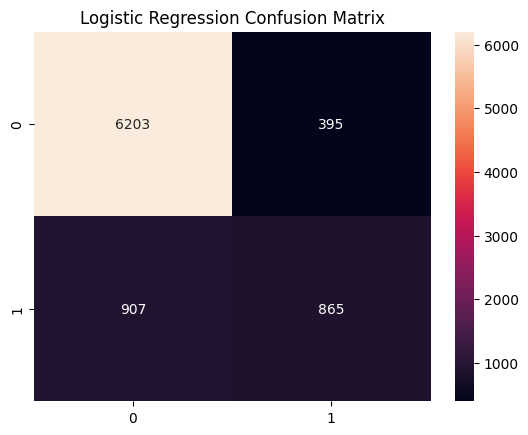

In [54]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

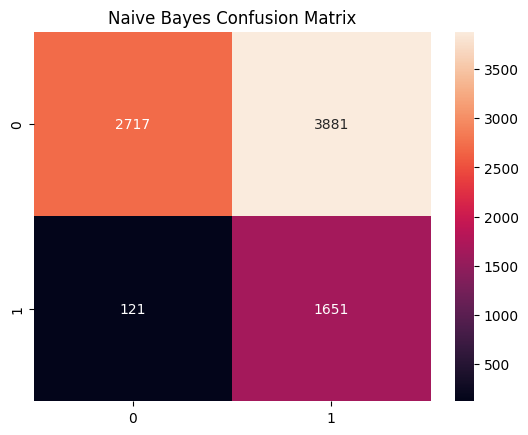

In [55]:
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d')
plt.title("Naive Bayes Confusion Matrix")
plt.show()